 # Effect of weight initialization on a model (Intel Scene Multi-Class Image Classification)


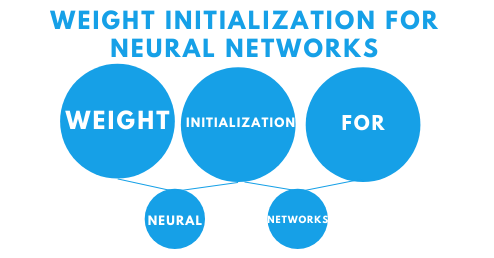

In [27]:
from IPython.display import Image
Image("/content/weight.png") 

Identifying natural scenes from all around the world is an interesting computer vision problem. In this challenge, we are going to classify six different category Imges.This dataset contains about ~25k images from a wide range of natural scenes from all around the world. The task is to identify which kind of scene can the image be categorized into.

It is a 6 class problem

- Buildings
-Forests
-Mountains
- Glacier
- Street
- Sea


In [2]:
from google.colab import files
files.upload()

{}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d puneet6060/intel-image-classification

intel-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


## Given data is in Zip format. So first we have to unzip the files

In [11]:
!unzip "/content/intel-image-classification.zip"

Archive:  /content/intel-image-classification.zip
replace seg_pred/seg_pred/10004.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Import the libraries:

In [12]:
from tensorflow import keras
import pandas as pd
import numpy as np
from keras.layers import MaxPool2D,Convolution2D,Flatten,Dense,MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

##Visualize some Random Images from Training set

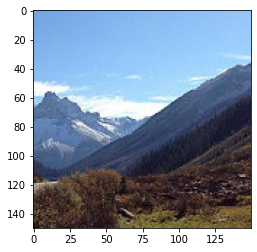

In [7]:
image = load_img("/content/seg_train/seg_train/mountain/10008.jpg")
plt.imshow(image)

## Transforms for image -augmentations


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Get the training and testing data
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('seg_train/seg_train', 
                                                    target_size = (64, 64), 
                                                    batch_size = 32)
test_set = test_datagen.flow_from_directory('seg_test/seg_test',
                                                target_size = (64, 64),
                                                 batch_size = 32)


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


## Generator work

In [28]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

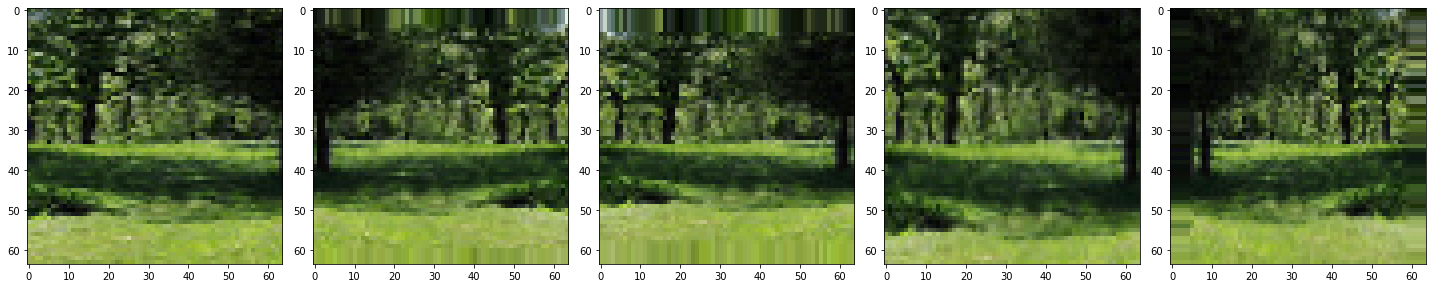

In [30]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

# Effect of weight initialization on a model

Layers weights initialization is a very important aspect of deep learning that can improve or decrease perfomance of your model. In model  run an experiment about using Glorot (Xavier) $He$  distributions and other random initialization  for layer weights initialization and it's influence on training process with ReLU and other activations.

Following are some techniques generally practised to initialize parameters :
- Zero initialization
- Random initialization

## Zero initialization

- Zero initialization means that we are gonna initialize every weight and bias as zero in each layer.
- If all the weights are initialized with 0, the derivative with respect to loss function is the same for every w in W[l], 
thus all weights have the same value in subsequent iterations. 
- This makes hidden units symmetric and continues for all the n iterations i.e. setting weights to 0 does not make it better than a linear model.
- An important thing to keep in mind is that biases have no effect what so ever when initialized with 0.

In [31]:
model_zero_init=Sequential()
model_zero_init.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu',kernel_initializer='zeros',bias_initializer='zeros'))
model_zero_init.add(MaxPooling2D(pool_size=(2,2)))
model_zero_init.add(Flatten())
model_zero_init.add(Dense(3000,activation='relu',kernel_initializer='zeros',bias_initializer='zeros'))
model_zero_init.add(Dense(units=6,activation='softmax',  kernel_initializer='zeros', bias_initializer='zeros'))

In [32]:
model_zero_init.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [33]:
zero_model = model_zero_init.fit_generator(training_set,
                        steps_per_epoch = 100,
                        epochs = 4,
                        validation_data = test_set,
                        validation_steps = 100)

Epoch 1/4
100/100 [==============================] - 9s 89ms/step - loss: 1.7917 - accuracy: 0.1761 - val_loss: 1.7916 - val_accuracy: 0.1707
Epoch 2/4
100/100 [==============================] - 8s 85ms/step - loss: 1.7918 - accuracy: 0.1599 - val_loss: 1.7907 - val_accuracy: 0.1805
Epoch 3/4
100/100 [==============================] - 9s 86ms/step - loss: 1.7909 - accuracy: 0.1915 - val_loss: 1.7908 - val_accuracy: 0.1717
Epoch 4/4
100/100 [==============================] - 8s 85ms/step - loss: 1.7915 - accuracy: 0.1746 - val_loss: 1.7905 - val_accuracy: 0.1768


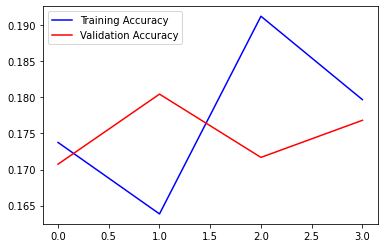

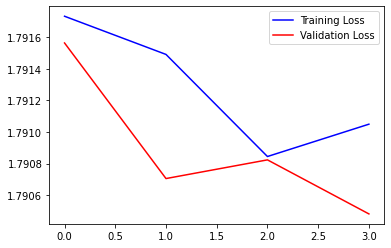

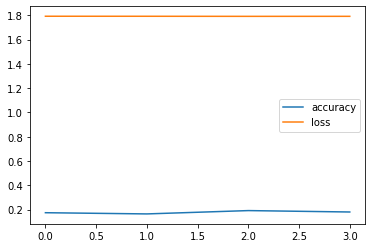

In [34]:
%matplotlib inline
acc=zero_model.history['accuracy']
val_acc=zero_model.history['val_accuracy']
loss=zero_model.history['loss']
val_loss=zero_model.history['val_loss']

epochs=range(4) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()


plt.plot([i for i in range(4)],zero_model.history['accuracy'],label='accuracy')
plt.plot([i for i in range(4)],zero_model.history['loss'],label="loss")
plt.legend()
plt.show()


The accuracy of the model is only 18%
This shows that zero initialization is no good since from this plot we can clearly see neither the loss of the model is going down nor the accuracy is increasing

## One Initialization

In this method we are gonna intialize every weight and bias as ones 

In [35]:
# creating the model_one_init
model_one_init=Sequential()
model_one_init.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu',kernel_initializer='ones',bias_initializer='ones'))
model_one_init.add(MaxPooling2D(pool_size=(2,2)))
model_one_init.add(Flatten())
model_one_init.add(Dense(3000,activation='relu',kernel_initializer='ones',bias_initializer='ones'))
model_one_init.add(Dense(units=6,activation='softmax',  kernel_initializer='ones', bias_initializer='ones'))

In [36]:
model_one_init.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [37]:
one_model = model_one_init.fit_generator(training_set,
                        steps_per_epoch = 100,
                        epochs = 4,
                        validation_data = test_set,
                        validation_steps = 100)

Epoch 1/4
100/100 [==============================] - 9s 87ms/step - loss: 830774.9633 - accuracy: 0.1679 - val_loss: 317304.6875 - val_accuracy: 0.1620
Epoch 2/4
100/100 [==============================] - 8s 85ms/step - loss: 402158.0164 - accuracy: 0.1625 - val_loss: 226139.0625 - val_accuracy: 0.1695
Epoch 3/4
100/100 [==============================] - 8s 85ms/step - loss: 272170.9356 - accuracy: 0.1701 - val_loss: 260157.0000 - val_accuracy: 0.1723
Epoch 4/4
100/100 [==============================] - 9s 86ms/step - loss: 260107.1151 - accuracy: 0.1554 - val_loss: 198686.4375 - val_accuracy: 0.1795


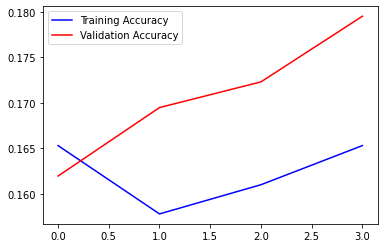

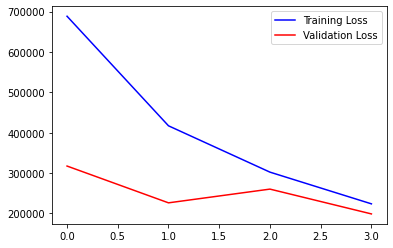

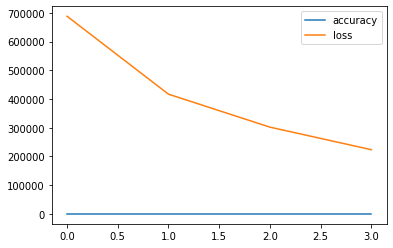

In [38]:
%matplotlib inline
acc=one_model.history['accuracy']
val_acc=one_model.history['val_accuracy']
loss=one_model.history['loss']
val_loss=one_model.history['val_loss']

epochs=range(4) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()


plt.plot([i for i in range(4)],one_model.history['accuracy'],label='accuracy')
plt.plot([i for i in range(4)],one_model.history['loss'],label="loss")
plt.legend()
plt.show()

The loss decrease certainly looks better, much better than throwing all zeros. The training and the validation accuracy also seemed to be in sync.

## Random Initialization

This time we are gonna randomly initialize the weights and the bias of the model .But there is one thing to keep in my mind is that what happens if weights are initialized high values or very low values and what is a reasonable initialization of weight values.

If weights are initialized with very high values the term np.dot(W,X)+b becomes significantly higher and if an activation function like sigmoid() is applied, the function maps its value near to 1 where the slope of gradient changes slowly and learning takes a lot of time.

This problem is often referred to as the vanishing gradient.

In [39]:
# creating the model_random_init
model_random_init=Sequential()
model_random_init.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu',kernel_initializer='random_normal',bias_initializer='random_normal'))
model_random_init.add(MaxPooling2D(pool_size=(2,2)))
model_random_init.add(Flatten())
model_random_init.add(Dense(3000,activation='relu',kernel_initializer='random_normal',bias_initializer='random_normal'))
model_random_init.add(Dense(units=6,activation='softmax',  kernel_initializer='random_normal', bias_initializer='random_normal'))

In [40]:
model_random_init.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [41]:
random_model = model_random_init.fit_generator(training_set,
                        steps_per_epoch = 100,
                        epochs = 4,
                        validation_data = test_set,
                        validation_steps = 100)

Epoch 1/4
100/100 [==============================] - 9s 88ms/step - loss: 12.1977 - accuracy: 0.3416 - val_loss: 1.1829 - val_accuracy: 0.5896
Epoch 2/4
100/100 [==============================] - 8s 86ms/step - loss: 0.9656 - accuracy: 0.6637 - val_loss: 1.0596 - val_accuracy: 0.6103
Epoch 3/4
100/100 [==============================] - 8s 84ms/step - loss: 0.9665 - accuracy: 0.6328 - val_loss: 0.9764 - val_accuracy: 0.6557
Epoch 4/4
100/100 [==============================] - 8s 85ms/step - loss: 0.8527 - accuracy: 0.6846 - val_loss: 0.9075 - val_accuracy: 0.6645


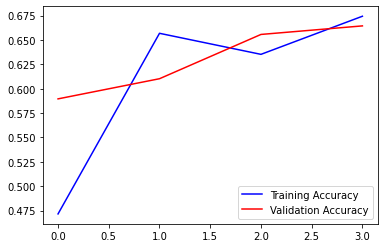

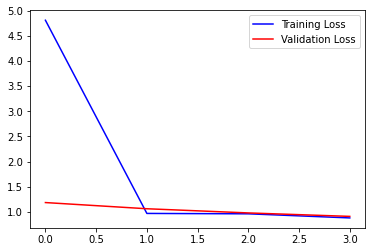

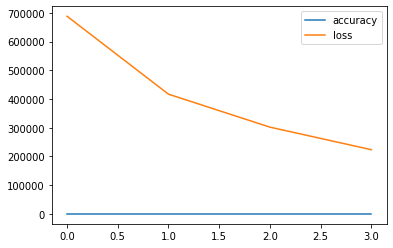

In [42]:
%matplotlib inline
acc=random_model.history['accuracy']
val_acc=random_model.history['val_accuracy']
loss=random_model.history['loss']
val_loss=random_model.history['val_loss']

epochs=range(4) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()


plt.plot([i for i in range(4)],one_model.history['accuracy'],label='accuracy')
plt.plot([i for i in range(4)],one_model.history['loss'],label="loss")
plt.legend()
plt.show()

This solution is better but doesn’t properly fulfil the needs so, let us see a new technique.

## New Initialization techniques

As we saw above that with large or 0 initialization of weights(W), not significant result is obtained even if we use appropriate initialization of weights it is probable that training process is going to take longer time. There are certain problems associated with it :

a) If the model is too large and takes many days to train then what

b) What about vanishing/exploding gradient problem

These were some problems that stood in the path for many years but in 2015, He et al. (2015) proposed activation aware initialization of weights (for ReLu) that was able to resolve this problem. ReLu and leaky ReLu also solves the problem of vanishing gradient.

## He initialization

 we just simply multiply random initialization with

 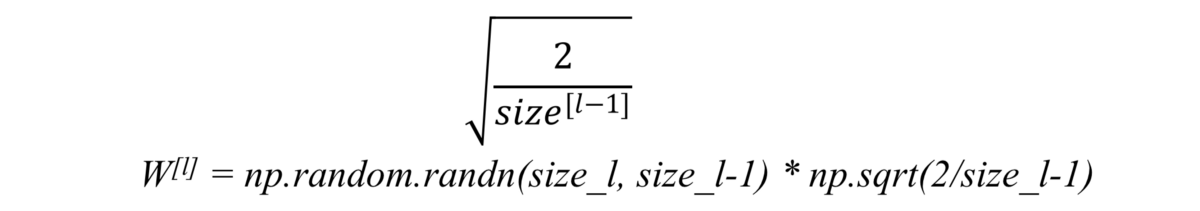

In [43]:
# creating the model_glorot_init
model_He_init=Sequential()
model_He_init.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu',kernel_initializer='he_normal',bias_initializer='he_normal'))
model_He_init.add(MaxPooling2D(pool_size=(2,2)))
model_He_init.add(Flatten())
model_He_init.add(Dense(3000,activation='relu',kernel_initializer='he_normal',bias_initializer='he_normal'))
model_He_init.add(Dense(units=6,activation='softmax',  kernel_initializer='he_normal', bias_initializer='he_normal'))

In [44]:
model_He_init.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])
He_model = model_He_init.fit_generator(training_set,
                        steps_per_epoch = 100,
                        epochs = 4,
                        validation_data = test_set,
                        validation_steps = 100)

Epoch 1/4
100/100 [==============================] - 9s 89ms/step - loss: 29.0044 - accuracy: 0.3010 - val_loss: 1.2329 - val_accuracy: 0.5818
Epoch 2/4
100/100 [==============================] - 8s 85ms/step - loss: 1.1235 - accuracy: 0.5936 - val_loss: 1.4082 - val_accuracy: 0.5254
Epoch 3/4
100/100 [==============================] - 8s 84ms/step - loss: 1.1974 - accuracy: 0.5882 - val_loss: 1.2107 - val_accuracy: 0.5780
Epoch 4/4
100/100 [==============================] - 9s 87ms/step - loss: 0.9933 - accuracy: 0.6244 - val_loss: 0.9756 - val_accuracy: 0.6425


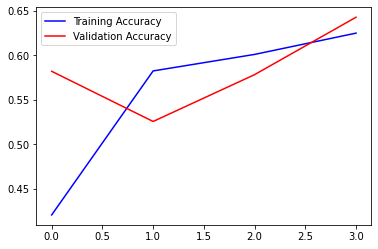

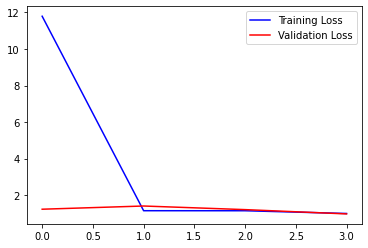

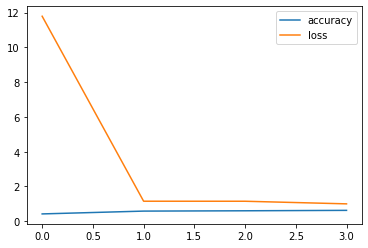

In [45]:
%matplotlib inline
acc=He_model.history['accuracy']
val_acc=He_model.history['val_accuracy']
loss=He_model.history['loss']
val_loss=He_model.history['val_loss']

epochs=range(4) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()


plt.plot([i for i in range(4)],He_model.history['accuracy'],label='accuracy')
plt.plot([i for i in range(4)],He_model.history['loss'],label="loss")
plt.legend()
plt.show()

Surely, this is an improvement over the previous techniques.
There are also some other techniques other than He initialization in use that is comparatively better than old techniques and are used frequently.

## Xavier Initialization/Glorot 

It is same as He initialization but it is used for tanh() activation function, in this method 2 is replaced with 1.
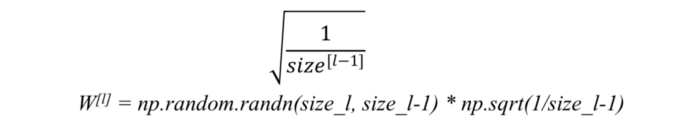

Some also use the following technique for initialization :
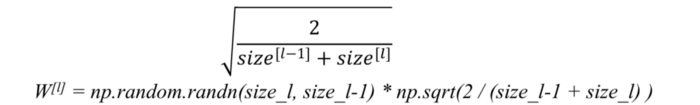

In [46]:
# creating the model_glorot_init
model_glorot_init=Sequential()
model_glorot_init.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu',kernel_initializer='glorot_normal',bias_initializer='glorot_normal'))
model_glorot_init.add(MaxPooling2D(pool_size=(2,2)))
model_glorot_init.add(Flatten())
model_glorot_init.add(Dense(3000,activation='relu',kernel_initializer='glorot_normal',bias_initializer='glorot_normal'))
model_glorot_init.add(Dense(units=6,activation='softmax',  kernel_initializer='glorot_normal', bias_initializer='glorot_normal'))

In [47]:
model_glorot_init.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])
glorot_model = model_glorot_init.fit_generator(training_set,
                        steps_per_epoch = 100,
                        epochs = 4,
                        validation_data = test_set,
                        validation_steps = 100)

Epoch 1/4
100/100 [==============================] - 9s 87ms/step - loss: 9.5795 - accuracy: 0.3539 - val_loss: 1.2226 - val_accuracy: 0.5512
Epoch 2/4
100/100 [==============================] - 8s 84ms/step - loss: 1.1102 - accuracy: 0.5954 - val_loss: 1.1861 - val_accuracy: 0.5902
Epoch 3/4
100/100 [==============================] - 8s 84ms/step - loss: 0.9741 - accuracy: 0.6312 - val_loss: 1.1040 - val_accuracy: 0.6096
Epoch 4/4
100/100 [==============================] - 8s 84ms/step - loss: 0.9346 - accuracy: 0.6512 - val_loss: 0.9050 - val_accuracy: 0.6770


In [48]:
# Get the accuracy score
acc = glorot_model.history['accuracy'][-1]*100

# Display the results
print('{}% accuracy on the test set'.format(acc))

64.6264910697937% accuracy on the test set


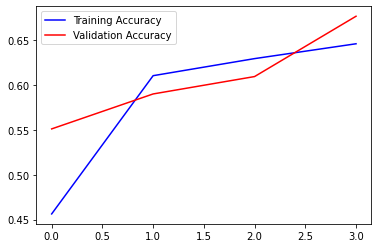

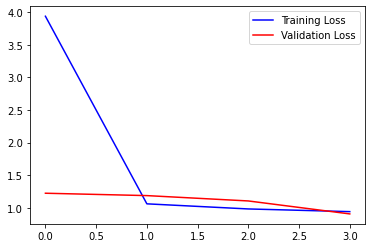

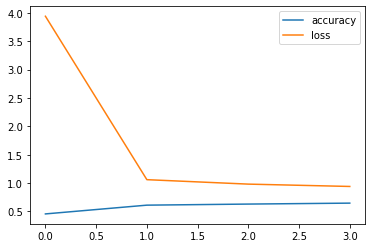

In [49]:
%matplotlib inline
acc=glorot_model.history['accuracy']
val_acc=glorot_model.history['val_accuracy']
loss=glorot_model.history['loss']
val_loss=glorot_model.history['val_loss']

epochs=range(4) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()


plt.plot([i for i in range(4)],glorot_model.history['accuracy'],label='accuracy')
plt.plot([i for i in range(4)],glorot_model.history['loss'],label="loss")
plt.legend()
plt.show()

it given some good results

I want to use glorot/he normal and glorot/he uniform distributions and ReLU/lek activations, so in total I will get 8 models to train:

## ReLU,leaky RELU, or tanh use He initialization

In [14]:
accuracy=[]
activation_init_weights=[]
def define_model(activation='relu', init_weights='he_normal', optimizer='Adam'):
  activation_init_weights.append(activation+'_'+init_weights)
  model_init=Sequential()
  model_init.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation=activation,kernel_initializer=init_weights,bias_initializer=init_weights))
  model_init.add(MaxPooling2D(pool_size=(2,2)))
  model_init.add(Flatten())
  model_init.add(Dense(3000,activation=activation,kernel_initializer=init_weights,bias_initializer=init_weights))
  model_init.add(Dense(units=6,activation='softmax',  kernel_initializer=init_weights, bias_initializer=init_weights))
  model_init.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])
  model_history = model_init.fit_generator(training_set,
                        steps_per_epoch = 100,
                        epochs = 4,
                        validation_data = test_set,
                        validation_steps = 100)
  acc = model_history.history['accuracy'][-1]*100
  accuracy.append(round(acc,2))

In [15]:
accuracy,activation_init_weights

([], [])

In [16]:
activation = ['softmax', 'relu', 'sigmoid','tanh','LeakyReLU']
init_weights = ['uniform', 'normal', 'he_uniform','glorot_normal']

In [17]:
define_model(activation='relu', init_weights='uniform', optimizer='Adam')

Epoch 1/4
100/100 [==============================] - 23s 90ms/step - loss: 3.8694 - accuracy: 0.2956 - val_loss: 1.2741 - val_accuracy: 0.5222
Epoch 2/4
100/100 [==============================] - 9s 86ms/step - loss: 1.0611 - accuracy: 0.5931 - val_loss: 1.1051 - val_accuracy: 0.5852
Epoch 3/4
100/100 [==============================] - 8s 85ms/step - loss: 0.9519 - accuracy: 0.6443 - val_loss: 0.9411 - val_accuracy: 0.6657
Epoch 4/4
100/100 [==============================] - 8s 85ms/step - loss: 0.8985 - accuracy: 0.6601 - val_loss: 0.9108 - val_accuracy: 0.6817


In [18]:
define_model(activation='relu', init_weights='normal', optimizer='Adam')
define_model(activation='relu', init_weights='he_uniform', optimizer='Adam')
define_model(activation='relu', init_weights='glorot_normal', optimizer='Adam')

Epoch 1/4
100/100 [==============================] - 9s 88ms/step - loss: 10.7714 - accuracy: 0.2841 - val_loss: 1.2411 - val_accuracy: 0.5128
Epoch 2/4
100/100 [==============================] - 8s 84ms/step - loss: 1.1082 - accuracy: 0.5616 - val_loss: 1.5279 - val_accuracy: 0.4925
Epoch 3/4
100/100 [==============================] - 8s 85ms/step - loss: 1.0036 - accuracy: 0.6226 - val_loss: 1.0290 - val_accuracy: 0.6259
Epoch 4/4
100/100 [==============================] - 8s 85ms/step - loss: 0.9095 - accuracy: 0.6678 - val_loss: 0.9713 - val_accuracy: 0.6410
Epoch 1/4
100/100 [==============================] - 9s 87ms/step - loss: 43.8524 - accuracy: 0.3050 - val_loss: 1.1543 - val_accuracy: 0.5793
Epoch 2/4
100/100 [==============================] - 8s 85ms/step - loss: 1.3249 - accuracy: 0.5395 - val_loss: 1.7479 - val_accuracy: 0.4922
Epoch 3/4
100/100 [==============================] - 8s 85ms/step - loss: 1.2688 - accuracy: 0.5530 - val_loss: 1.2024 - val_accuracy: 0.5952
Epoc

In [19]:
define_model(activation='LeakyReLU', init_weights='uniform', optimizer='Adam')
define_model(activation='LeakyReLU', init_weights='normal', optimizer='Adam')
define_model(activation='LeakyReLU', init_weights='he_uniform', optimizer='Adam')
define_model(activation='LeakyReLU', init_weights='glorot_normal', optimizer='Adam')

Epoch 1/4
100/100 [==============================] - 9s 87ms/step - loss: 5.0220 - accuracy: 0.3851 - val_loss: 1.2849 - val_accuracy: 0.5498
Epoch 2/4
100/100 [==============================] - 8s 84ms/step - loss: 1.1420 - accuracy: 0.5735 - val_loss: 1.1463 - val_accuracy: 0.5949
Epoch 3/4
100/100 [==============================] - 8s 85ms/step - loss: 1.0244 - accuracy: 0.6190 - val_loss: 1.1710 - val_accuracy: 0.6159
Epoch 4/4
100/100 [==============================] - 8s 85ms/step - loss: 0.9971 - accuracy: 0.6171 - val_loss: 1.0532 - val_accuracy: 0.6225
Epoch 1/4
100/100 [==============================] - 10s 88ms/step - loss: 23.0660 - accuracy: 0.3596 - val_loss: 1.2804 - val_accuracy: 0.5811
Epoch 2/4
100/100 [==============================] - 9s 86ms/step - loss: 1.0982 - accuracy: 0.6016 - val_loss: 1.2727 - val_accuracy: 0.5921
Epoch 3/4
100/100 [==============================] - 8s 85ms/step - loss: 1.1531 - accuracy: 0.5917 - val_loss: 1.2300 - val_accuracy: 0.6128
Epoc

In [20]:
define_model(activation='tanh', init_weights='uniform', optimizer='Adam')
define_model(activation='tanh', init_weights='normal', optimizer='Adam')
define_model(activation='tanh', init_weights='he_uniform', optimizer='Adam')
define_model(activation='tanh', init_weights='glorot_normal', optimizer='Adam')

Epoch 1/4
100/100 [==============================] - 9s 87ms/step - loss: 5.8502 - accuracy: 0.4132 - val_loss: 1.2874 - val_accuracy: 0.5680
Epoch 2/4
100/100 [==============================] - 8s 85ms/step - loss: 1.2289 - accuracy: 0.5648 - val_loss: 1.5382 - val_accuracy: 0.5147
Epoch 3/4
100/100 [==============================] - 9s 86ms/step - loss: 1.2041 - accuracy: 0.5569 - val_loss: 1.2320 - val_accuracy: 0.5705
Epoch 4/4
100/100 [==============================] - 9s 87ms/step - loss: 1.0842 - accuracy: 0.5858 - val_loss: 1.3343 - val_accuracy: 0.5840
Epoch 1/4
100/100 [==============================] - 9s 88ms/step - loss: 11.8958 - accuracy: 0.3360 - val_loss: 1.2500 - val_accuracy: 0.5395
Epoch 2/4
100/100 [==============================] - 9s 87ms/step - loss: 1.2129 - accuracy: 0.5449 - val_loss: 1.5324 - val_accuracy: 0.4837
Epoch 3/4
100/100 [==============================] - 8s 85ms/step - loss: 1.2269 - accuracy: 0.5537 - val_loss: 1.2936 - val_accuracy: 0.5285
Epoch

In [21]:
define_model(activation='sigmoid', init_weights='uniform', optimizer='Adam')
define_model(activation='sigmoid', init_weights='normal', optimizer='Adam')
define_model(activation='sigmoid', init_weights='he_uniform', optimizer='Adam')
define_model(activation='sigmoid', init_weights='glorot_normal', optimizer='Adam')

Epoch 1/4
100/100 [==============================] - 9s 89ms/step - loss: 5.9917 - accuracy: 0.1907 - val_loss: 1.8280 - val_accuracy: 0.1830
Epoch 2/4
100/100 [==============================] - 9s 87ms/step - loss: 1.8737 - accuracy: 0.1735 - val_loss: 1.8504 - val_accuracy: 0.1902
Epoch 3/4
100/100 [==============================] - 9s 87ms/step - loss: 1.8772 - accuracy: 0.1746 - val_loss: 1.8313 - val_accuracy: 0.1751
Epoch 4/4
100/100 [==============================] - 9s 86ms/step - loss: 1.8695 - accuracy: 0.1795 - val_loss: 1.8296 - val_accuracy: 0.1789
Epoch 1/4
100/100 [==============================] - 9s 89ms/step - loss: 7.3102 - accuracy: 0.1662 - val_loss: 1.8486 - val_accuracy: 0.1855
Epoch 2/4
100/100 [==============================] - 8s 85ms/step - loss: 1.8742 - accuracy: 0.1800 - val_loss: 1.8857 - val_accuracy: 0.1831
Epoch 3/4
100/100 [==============================] - 8s 84ms/step - loss: 1.9468 - accuracy: 0.1700 - val_loss: 1.8662 - val_accuracy: 0.1855
Epoch 

In [22]:
data=pd.DataFrame({"activation_init_weights":activation_init_weights,"accuracy":accuracy})

In [23]:
data

,activation_init_weights,accuracy
0,relu_uniform,66.12
1,relu_normal,66.28
2,relu_he_uniform,62.53
3,relu_glorot_normal,64.78
4,LeakyReLU_uniform,63.03
5,LeakyReLU_normal,63.16
6,LeakyReLU_he_uniform,60.53
7,LeakyReLU_glorot_normal,59.38
8,tanh_uniform,60.04
9,tanh_normal,59.17


In [26]:
data.sort_values("accuracy",ascending=False)

,activation_init_weights,accuracy
1,relu_normal,66.28
0,relu_uniform,66.12
3,relu_glorot_normal,64.78
5,LeakyReLU_normal,63.16
4,LeakyReLU_uniform,63.03
2,relu_he_uniform,62.53
6,LeakyReLU_he_uniform,60.53
8,tanh_uniform,60.04
7,LeakyReLU_glorot_normal,59.38
9,tanh_normal,59.17
